<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Traitement des Données Manquantes

Nous avons déjà passé en revue les opérations Pandas pour traiter les données manquantes, appliquons maintenant cela pour nettoyer un fichier réel de données. Gardez à l'esprit qu'il n'y a pas de façon 100% correcte de faire cela, et que ce notebook sert juste d'exemple de quelques approches raisonnables à prendre sur ces données.

#### Remarque : Tout au long de cette section, nous allons lentement nettoyer et ajouter des features (caractéristiques) au dataset Ames sur les maisons à vendre pour les utiliser dans la section suivante. Assurez-vous de toujours charger le même nom de fichier que dans le notebook.

#### 2e remarque : Certaines des méthodes présentées ici peuvent ne pas conduire à des performances optimales, mais sont plutôt présentées à titre d'exemples des différentes méthodes disponibles.
-----


## Importations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with open('Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Données


In [2]:
df = pd.read_csv("Ames_outliers_removed.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
len(df.columns)

81

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

### Suppression de PID

Nous avons déjà un index, donc nous n'avons pas besoin de l'identifiant unique PID pour la régression que nous effectuerons plus tard.

In [6]:
df = df.drop('PID',axis=1)

In [7]:
len(df.columns)

80

## Observation des Features NaN

In [8]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [9]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [10]:
100* df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [11]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [12]:
percent_nan = percent_missing(df)

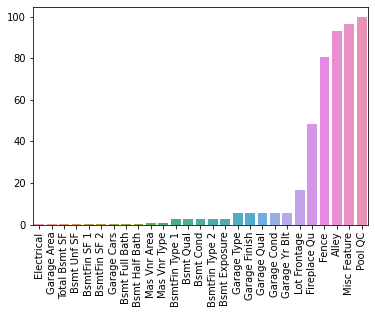

In [13]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Suppression des Features ou Suppression des lignes

Si quelques lignes seulement, par rapport à la taille de votre ensemble de données, manquent de valeurs, il peut être judicieux d'éliminer ces lignes. Qu'est-ce que cela vous coûte en termes de performance ? Cela supprime essentiellement des données d'entraînement/de test potentielles, mais s'il ne s'agit que de quelques lignes, il est peu probable que cela change les performances.

Parfois, c'est une bonne idée de supprimer entièrement une Feature (caractéristique) si elle a trop de valeurs manquantes (null). Cependant, vous devez examiner attentivement pourquoi il y a autant de valeurs manquantes. Dans certaines situations, les valeurs manquantes pourraient simplement être utilisées comme une catégorie distincte. 

Prenons l'exemple d'une colonne de features indiquant le nombre de voitures que peut accueillir un garage. S'il n'y a pas de garage, il y a peut-être une valeur manquante (null) au lieu d'un zéro. Dans ce cas, il est surement plus logique de remplir rapidement les valeurs manquantes avec un 0 plutôt qu'une valeur null. Vous seul pouvez décider en fonction de votre expertise du domaine et de votre connaissance de l'ensemble de données !

# Travail basé sur les lignes des données manquantes

## Remplir ou supprimer des données ?

Explorons comment choisir de supprimer ou de compléter les données manquantes pour les lignes auxquelles il manque des données. Choisissons un seuil à partir duquel nous décidons qu'il est acceptable de supprimer une ligne s'il lui manque des données (au lieu d'essayer de compléter ce point de données manquant). Nous choisirons 1% comme seuil. Cela signifie que si moins de 1% des lignes manquent pour cette feature, nous envisagerons d'abandonner cette ligne, au lieu de traiter la feature elle-même. Il n'y a pas de bonne réponse ici, il suffit d'utiliser votre bon sens et vos connaissances du domaine de l'ensemble de données, évidemment vous ne voulez pas vous débarasser d'un seuil très élevé comme 50%, vous devriez également explorer la corrélation à l'ensemble de données, peut-être est-il logique de supprimer la feature à la place.

En vous basant sur la description textuelle des features, vous verrez que la plupart de ces données manquantes sont en fait des NaN intentionnellement utilisés pour remplacer 0 ou "None".

#### Exemple de remplissage des données

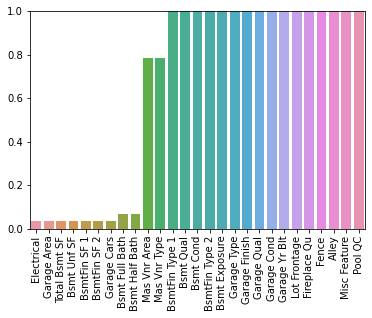

In [14]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Fixer le seuil (threshold) à 1%
plt.ylim(0,1);

Supprimons ou remplissons les lignes en fonction de ces données. Vous pouvez soit remplir manuellement les données (en particulier les données de sous-sol basées sur le fichier texte de description), soit simplement abandonner la ligne et ne pas en tenir compte. Regardez la vidéo pour une explication complète. En réalité, il est probablement plus logique de remplir les données manquantes du sous-sol car elles sont bien décrites dans le texte de description.

In [15]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [16]:
100/len(df)

0.0341646737273659

In [17]:
(0.034165/100)*len(df)

1.00000955

In [18]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [19]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


**Remplir les données à partir des noms de colonnes. Il existe 2 types de features du sous-sol, les descriptifs numériques et les descriptifs de type chaîne de caractères**.

Les colonnes numériques du sous-sol :

In [20]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

Les colonnes de type string du sous-sol :

In [21]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [22]:
percent_nan = percent_missing(df)

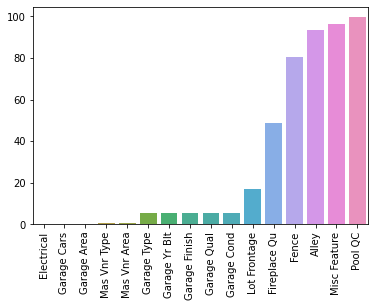

In [23]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Supprimer les lignes

Pour quelques-unes de ces features, il semble qu'il ne manque qu'une ou deux lignes de données. Sur la base de notre fichier .txt de description de l'ensemble de données, nous pourrions également remplir ces points de données facilement, et c'est l'approche la plus correcte. Mais ici nous allons montrer comment les supprimer au cas où vous vous trouvez dans une situation où il est plus logique de se débarasser d'une ligne, sur la base de features de colonnes manquantes.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [24]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [25]:
percent_nan = percent_missing(df)

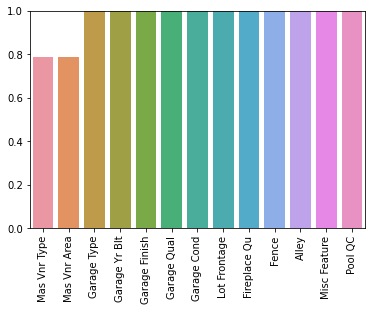

In [26]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1);

### Features "Mas Vnr"

À partir du fichier texte de description, le fait que Mas Vnr Type et Mas Vnr Area soient manquants (NaN) signifie probablement que la maison n'a tout simplement pas de placage en maçonnerie, auquel cas nous remplirons ces données comme nous l'avons fait auparavant.

In [27]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [28]:
percent_nan = percent_missing(df)

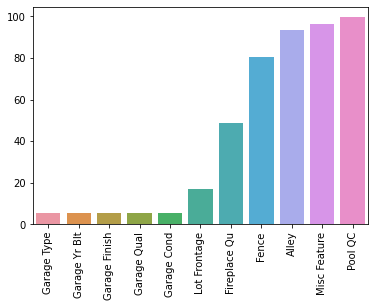

In [29]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Remplissage des données manquantes des colonnes

Nos approches précédentes étaient davantage basées sur les données manquantes des lignes, nous allons maintenant adopter une approche basée sur les Features des colonnes elles-mêmes, puisqu'un pourcentage plus important de données semble manquer.

### Colonnes Garage

D'après la description des données, ces NaN semblent indiquer l'absence de garage, nous les remplacerons donc par "None" ou 0.

In [30]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [31]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [32]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [33]:
percent_nan = percent_missing(df)

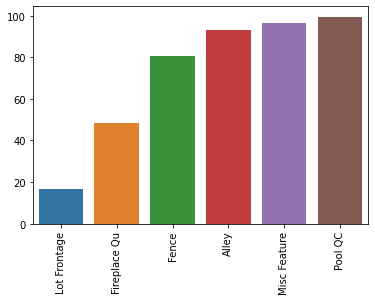

In [34]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Suppression des colonnes de Feature

Parfois, vous voudrez peut-être adopter l'approche selon laquelle, au-delà d'un certain seuil de pourcentage manquant, vous supprimerez simplement la Feature de toutes les données. Par exemple, s'il manque une feature dans 99 % des lignes, elle ne sera pas prédictive, puisque la quasi-totalité des données n'ont aucune valeur pour elle. Dans notre ensemble de données particulier, un grand nombre de ces features à pourcentage élevé de NaN sont en fait des espaces réservés pour "None" ou 0. Mais pour montrer des variations dans le traitement des données manquantes, nous allons supprimer ces features, au lieu de les remplir avec la valeur appropriée.

In [35]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [36]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2922,37.0,NaN,GdPrv,NaN,NaN,NaN
2923,NaN,NaN,MnPrv,NaN,NaN,NaN
2924,62.0,NaN,MnPrv,NaN,Shed,NaN
2925,77.0,TA,NaN,NaN,NaN,NaN


In [37]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [38]:
percent_nan = percent_missing(df)

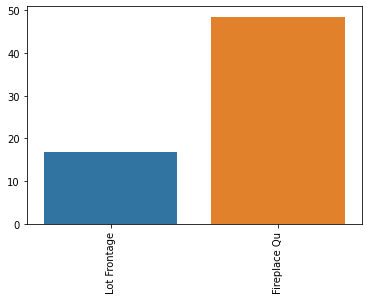

In [39]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Remplissage de la feature "Fireplace Quality" à partir du texte de description

In [40]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [41]:
percent_nan = percent_missing(df)

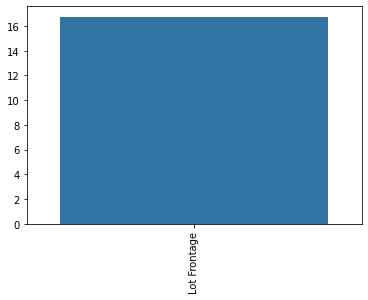

In [42]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) sur les Données Manquantes

Pour imputer les données manquantes, nous devons décider quelle autre feature bien complétée (pas de valeurs NaN) est la plus corrélée aux données de la feature manquante. Dans ce cas particulier, nous utiliserons :

"Neighborhood" : Emplacements physiques (quartiers) dans les limites de la ville d'Ames

"Lot Frontage" : Longueur (en pied) de la rue devant la propriété

Nous partons du principe que la longeur du lot (Lot Frontage) est liée au quartier (Neighborhood) dans lequel se trouve la maison.

In [43]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

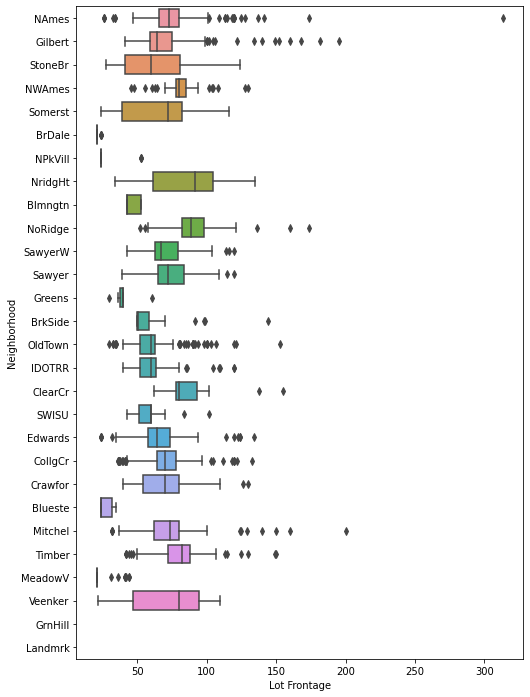

In [44]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h');

## Imputer les données manquantes en fonction d'autres features

Il existe des méthodes plus complexes, mais en général, plus c'est simple, mieux c'est. Cela évite de construire des modèles par-dessus d'autres modèles.

Plus d'informations sur les options : https://scikit-learn.org/stable/modules/impute.html

In [45]:
df.groupby('Neighborhood')['Lot Frontage']

In [46]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

## Transformation de colonne

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [47]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [48]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2894,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2895,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2909,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [49]:
df.iloc[21:26]['Lot Frontage']

21    85.0
22     NaN
23     NaN
24     NaN
25    65.0
Name: Lot Frontage, dtype: float64

In [50]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [51]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [52]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [53]:
percent_nan = percent_missing(df)

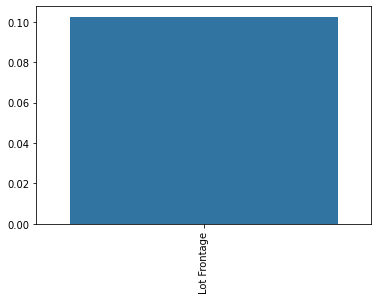

In [54]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [55]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [56]:
percent_nan = percent_missing(df)

In [57]:
percent_nan

Series([], dtype: float64)

Super ! Nous n'avons plus de données manquantes dans l'ensemble de notre dataset ! Gardez à l'esprit que nous devrions éventuellement ajouter toutes ces transformations dans une fonction facile à utiliser. Pour l'instant, sauvegardons cet ensemble de données pour la suite :

In [ ]:
df.to_csv("Ames_NO_Missing_Data.csv",index=False)